In [58]:
from sklearn.datasets import load_svmlight_file
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Load Dataset
X, y = load_svmlight_file('diabetes_scale.txt')
X_dense = X.toarray()

# Create a pandas dataframe
df = pd.DataFrame(X_dense)
df['Outcome'] = y

df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
    'Diabetes Pedigree', 'Age', 'Outcome'
]
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree,Age,Outcome
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1.0


# Data visualizations

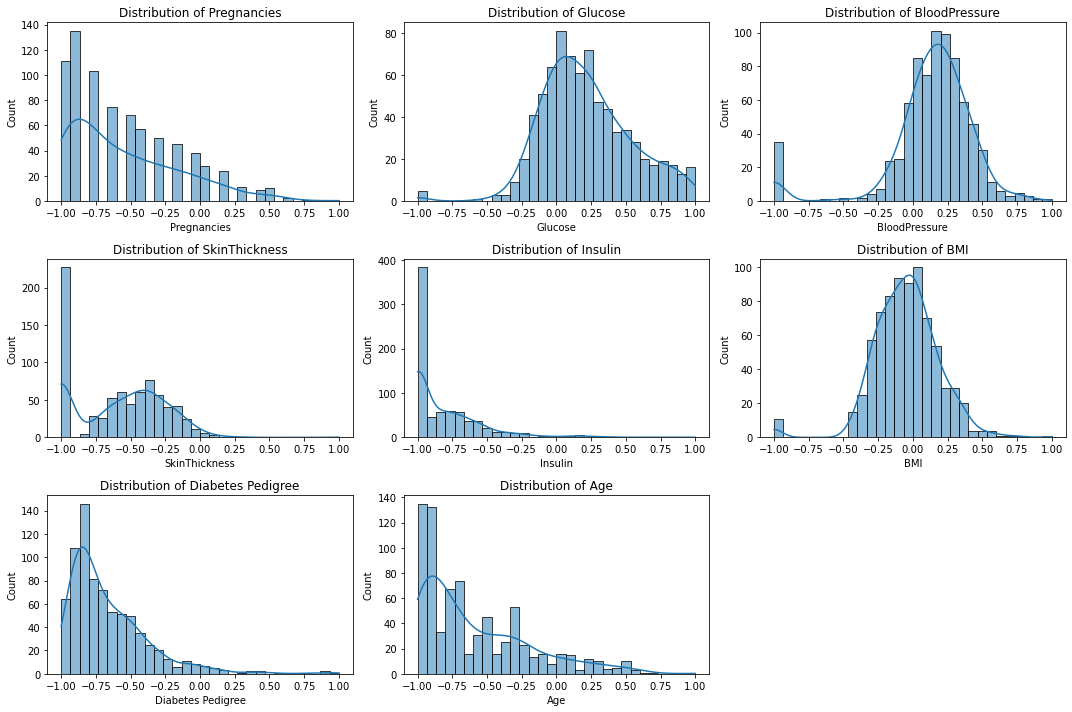

In [60]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

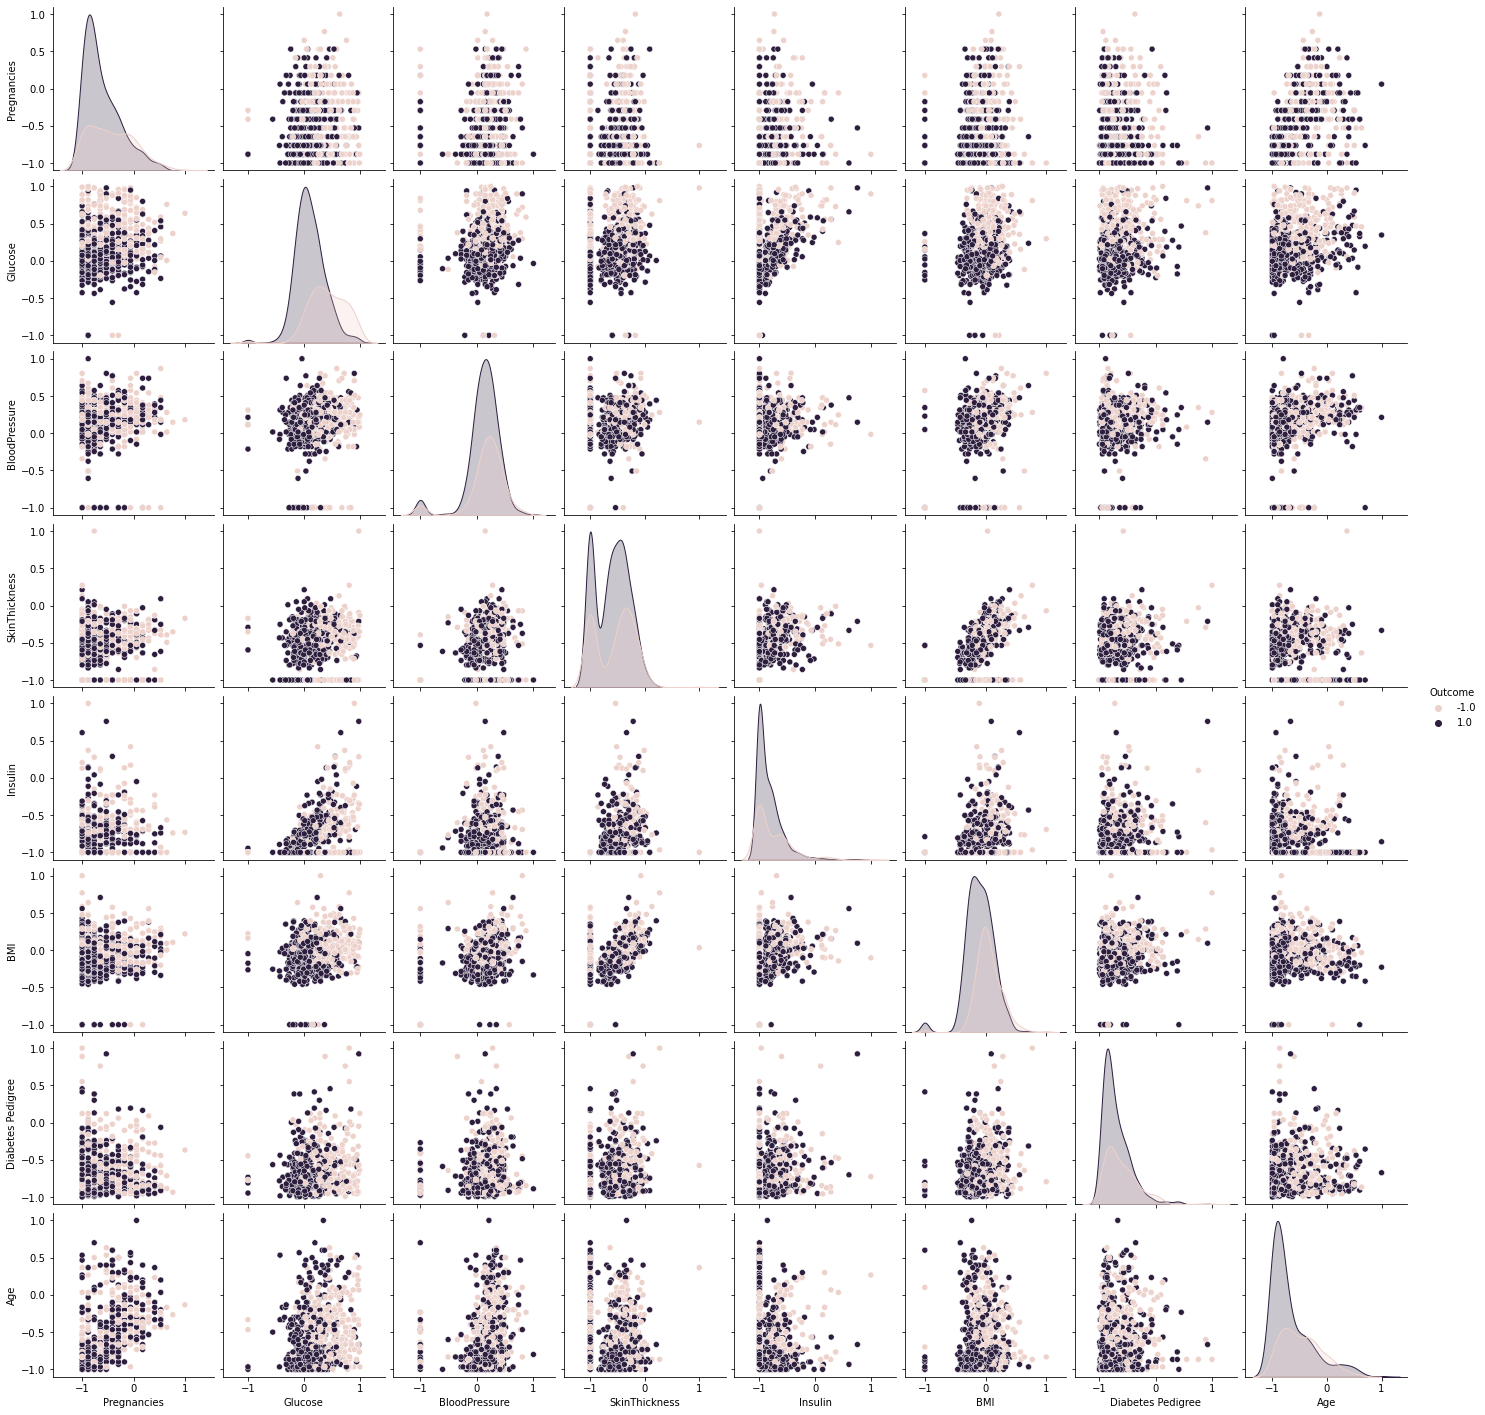

In [61]:
sns.pairplot(df, hue='Outcome')
plt.show()

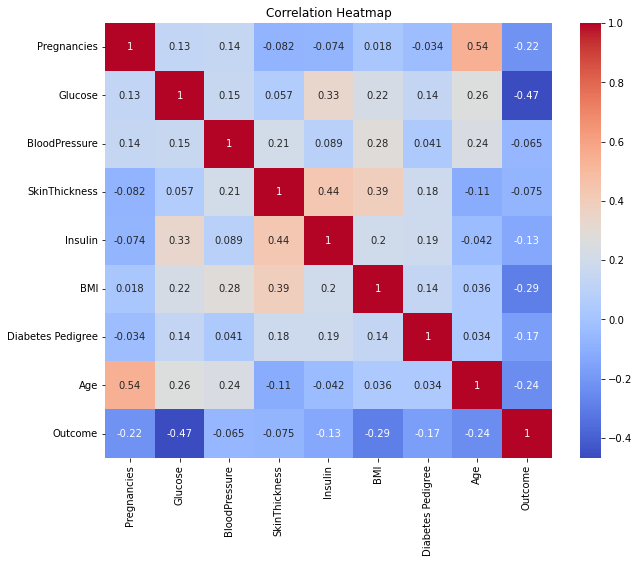

In [62]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Perceptron Algorithm

## Single Layer Perceptron

### Single Layer Perceptron Algorithm from scratch

In [63]:
import numpy as np

class _Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self.actv
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_func(linear_output)
        return y_pred

    def actv(self, x):
        return np.where(x>=0, 1, -1)

In [64]:
# Prepare the data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
# Train the perceptron
perceptron = _Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 74.68%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.75      0.26      0.38        47
         1.0       0.75      0.96      0.84       107

    accuracy                           0.75       154
   macro avg       0.75      0.61      0.61       154
weighted avg       0.75      0.75      0.70       154



In [66]:
# Create a perceptron object
clf = Perceptron()

# Train the perceptron
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 80.52%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.72      0.60      0.65        47
         1.0       0.83      0.90      0.86       107

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



### Try to drop some less necessary column

In [67]:
df_less = df.drop(columns=['BloodPressure', 'SkinThickness'])
# Prepare the data
X = df_less.iloc[:, :-1].values
y = df_less.iloc[:, -1].values

# Split the data into training and test sets
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train the perceptron
perceptron = _Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_less, y_train_less)

# Predict on the test set
y_pred = perceptron.predict(X_test_less)

# Calculate accuracy
accuracy = accuracy_score(y_test_less, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(y_test_less, y_pred)
print('Classification Report:')
print(report)

Accuracy: 76.62%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.67      0.67        55
         1.0       0.82      0.82      0.82        99

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [69]:
# Create a perceptron object
clf = Perceptron()

# Train the perceptron
clf.fit(X_train_less, y_train_less)

# Predict on the test set
y_pred = clf.predict(X_test_less)


# Calculate accuracy
accuracy = accuracy_score(y_test_less, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(y_test_less, y_pred)
print('Classification Report:')
print(report)

Accuracy: 75.97%
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.67      0.64      0.65        55
         1.0       0.80      0.83      0.82        99

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



## Multilayer Perceptron

In [74]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50, 50),  (50, 100, 50, 50), (50, 100, 50), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.1, 0.01, 0.001],
}

# Set up grid search with MLP classifier
mlp = MLPClassifier(max_iter=4000)
grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Fit model to training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print('Best parameters found: ', grid_search.best_params_)


Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}


In [79]:
# Plot the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

def param_set_description(param_set):
    return f"{param_set['hidden_layer_sizes']} - {param_set['activation']} - {param_set['solver']} - {param_set['learning_rate_init']:.4f}"

# Generate concise descriptions for each parameter set
results['param_set_description'] = results['params'].apply(param_set_description)

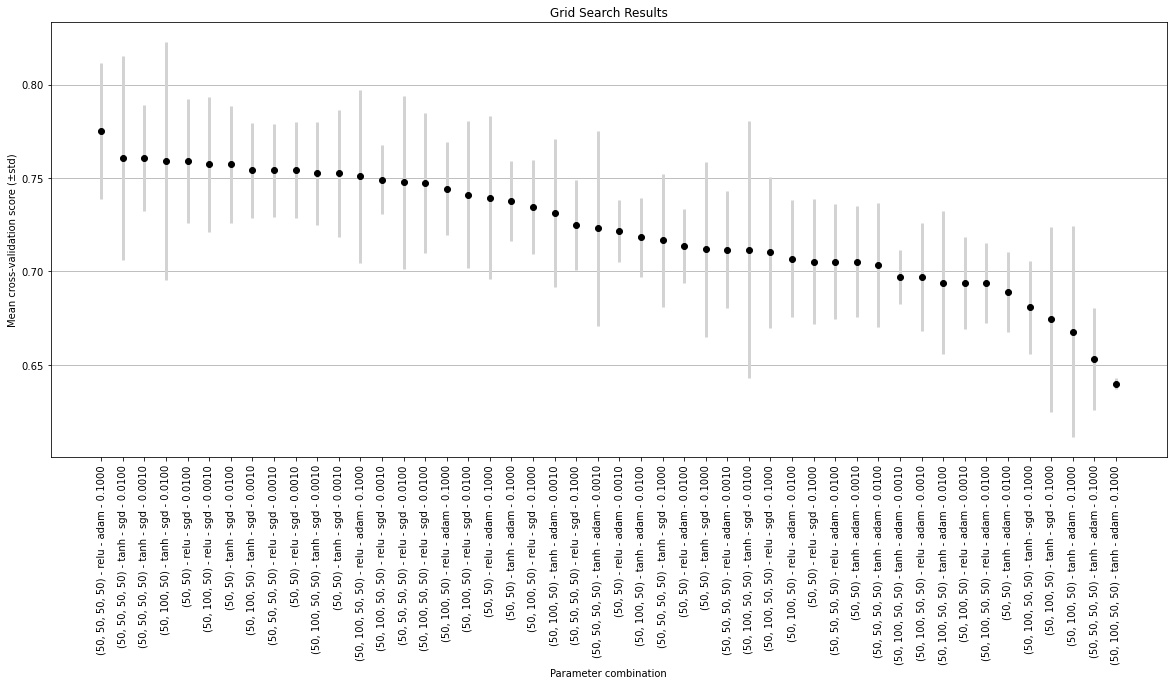

In [85]:
# Sort the results DataFrame based on the mean test score (in descending order)
results.sort_values('mean_test_score', ascending=False, inplace=True)

# Plot the results of the grid search
scores_mean = results['mean_test_score']
scores_sd = results['std_test_score']
param_set_descriptions = results['param_set_description']

plt.figure(figsize=(20,8))
plt.errorbar(range(len(scores_mean)), scores_mean, yerr=scores_sd, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Grid Search Results')
plt.xlabel('Parameter combination')
plt.ylabel('Mean cross-validation score (±std)')
plt.xticks(range(len(scores_mean)), param_set_descriptions, rotation=90)
plt.grid(axis='y')
plt.show()

In [81]:
# Evaluate the model with the best parameters on the test set
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.55      0.91      0.69        47
         1.0       0.95      0.67      0.79       107

    accuracy                           0.75       154
   macro avg       0.75      0.79      0.74       154
weighted avg       0.83      0.75      0.76       154



In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 74.68%


In [84]:
results['param_hidden_layer_sizes'] = results['param_hidden_layer_sizes'].astype(str)

# Print the results grouped by each parameter
parameters = ['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_learning_rate']
for parameter in parameters:
    print(f"Results w.r.t. {parameter}:")
    mean_scores = results.groupby(parameter)['mean_test_score'].mean()
    std_scores = results.groupby(parameter)['std_test_score'].mean()
    for param_val, mean_score, std_score in zip(mean_scores.index, mean_scores.values, std_scores.values):
        print(f"{param_val}: {mean_score:.4f} ± {std_score:.4f}")
    print()

Results w.r.t. param_hidden_layer_sizes:
(50, 100, 50): 0.7236 ± 0.0365
(50, 100, 50, 50): 0.7104 ± 0.0309
(50, 50): 0.7289 ± 0.0298
(50, 50, 50, 50): 0.7280 ± 0.0354

Results w.r.t. param_activation:
relu: 0.7308 ± 0.0309
tanh: 0.7147 ± 0.0354

Results w.r.t. param_solver:
adam: 0.7089 ± 0.0298
sgd: 0.7365 ± 0.0365

Results w.r.t. param_learning_rate:
constant: 0.7227 ± 0.0331

